In [104]:
import numpy as np
import matplotlib.pyplot as plt

import math, time
import itertools
import datetime
from operator import itemgetter
from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


import pandas as pd
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import Series

from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM


In [105]:
col_names = ['Timestamp','Sequence','Open','High','Low','Close','Volume']
apple = pd.read_csv('AMZN.csv')
apple.columns = col_names
apple['Timestamp'] =  pd.to_datetime(apple['Timestamp'],format='%Y-%m-%d %H:%M:%S')
apple.index = apple['Timestamp']
apple = apple.drop(['Sequence','Timestamp'],axis =1)
apple.head()

,Open,High,Low,Close,Volume
Timestamp,,,,,
2018-03-12 15:49:00,1598.5920,1600.2700,1598.4625,1599.860,26188
2018-03-12 15:50:00,1599.0000,1599.2500,1598.7000,1598.750,4850
2018-03-12 15:51:00,1599.0611,1599.3300,1598.7100,1598.905,6488
2018-03-12 15:52:00,1597.7900,1598.8357,1597.7700,1598.700,10751
2018-03-12 15:53:00,1598.7750,1599.0000,1597.8900,1598.290,1940


In [106]:
apple = apple[['Close']]

In [107]:
apple.head()

,Close
Timestamp,
2018-03-12 15:49:00,1599.860
2018-03-12 15:50:00,1598.750
2018-03-12 15:51:00,1598.905
2018-03-12 15:52:00,1598.700
2018-03-12 15:53:00,1598.290


In [108]:
df = apple.loc['2018-03-14']

In [109]:
df.shape

(391, 1)

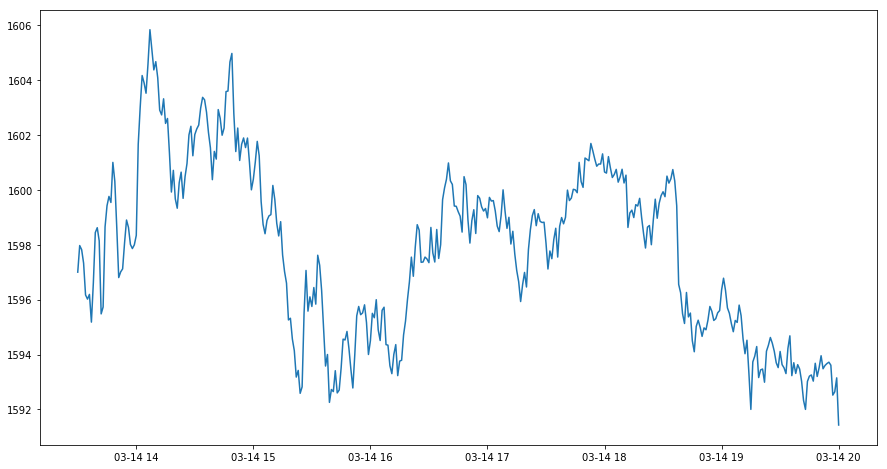

In [110]:
plt.figure(figsize=(15,8))
plt.plot(df)

In [111]:
# split data into train and test
X = df.values
train, test = X[0:300], X[300:]

RMSE: 0.671


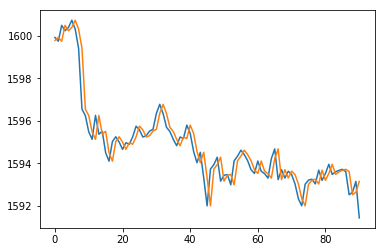

In [112]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [114]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 

# transform to supervised learning
X = df.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

         0        0
0     0.00  1597.00
1  1597.00  1597.97
2  1597.97  1597.82
3  1597.82  1597.33
4  1597.33  1596.17


In [98]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

series = df['Close']

print(series.head())

# transform to be stationary
differenced = difference(series, 1)
print(differenced.head())

# invert transform
inverted = list()
for i in range(len(differenced)):
	value = inverse_difference(series, differenced[i], len(series)-i)
	inverted.append(value)
inverted = Series(inverted)
print(inverted.head())

Timestamp
2018-03-13 13:30:00    1615.9600
2018-03-13 13:31:00    1616.9200
2018-03-13 13:32:00    1612.4100
2018-03-13 13:33:00    1612.5601
2018-03-13 13:34:00    1614.3100
Name: Close, dtype: float64
0    0.9600
1   -4.5100
2    0.1501
3    1.7499
4    0.7600
dtype: float64
0    1616.9200
1    1612.4100
2    1612.5601
3    1614.3100
4    1615.0700
dtype: float64


In [119]:
differenced.shape

(390,)

In [120]:
series = df['Close']
print(series.head())

# transform scale
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())

# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

Timestamp
2018-03-14 13:30:00    1597.00
2018-03-14 13:31:00    1597.97
2018-03-14 13:32:00    1597.82
2018-03-14 13:33:00    1597.33
2018-03-14 13:34:00    1596.17
Name: Close, dtype: float64
0   -0.226674
1   -0.092001
2   -0.112827
3   -0.180857
4   -0.341909
dtype: float64
0    1597.00
1    1597.97
2    1597.82
3    1597.33
4    1596.17
dtype: float64


Epoch 1/1
 - 5s - loss: 0.1325
Epoch 1/1
 - 1s - loss: 0.0789
Epoch 1/1
 - 1s - loss: 0.0560
Epoch 1/1
 - 1s - loss: 0.0477
Epoch 1/1
 - 1s - loss: 0.0423
Epoch 1/1
 - 1s - loss: 0.0382
Epoch 1/1
 - 1s - loss: 0.0350
Epoch 1/1
 - 1s - loss: 0.0325
Epoch 1/1
 - 1s - loss: 0.0305
Epoch 1/1
 - 1s - loss: 0.0289
Epoch 1/1
 - 1s - loss: 0.0277
Epoch 1/1
 - 1s - loss: 0.0268
Epoch 1/1
 - 1s - loss: 0.0261
Epoch 1/1
 - 1s - loss: 0.0255
Epoch 1/1
 - 1s - loss: 0.0249
Epoch 1/1
 - 1s - loss: 0.0243
Epoch 1/1
 - 1s - loss: 0.0238
Epoch 1/1
 - 1s - loss: 0.0232
Epoch 1/1
 - 1s - loss: 0.0226
Epoch 1/1
 - 1s - loss: 0.0220
Minute=1, Predicted=1596.400450, Expected=1601.060000
Minute=2, Predicted=1595.009542, Expected=1601.690000
Minute=3, Predicted=1595.783893, Expected=1601.420000
Minute=4, Predicted=1595.655215, Expected=1601.120000
Minute=5, Predicted=1594.689858, Expected=1600.860100
Minute=6, Predicted=1596.278087, Expected=1600.940600
Minute=7, Predicted=1598.342162, Expected=1600.940000
Mi

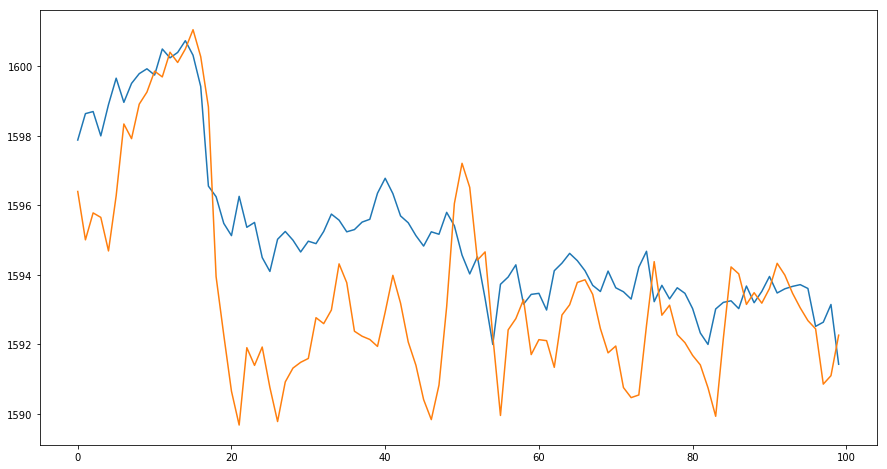

In [123]:
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
series = df["Close"]

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 30)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-100], supervised_values[-100:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 20, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Minute=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-100:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.figure(figsize=(15,8))
pyplot.plot(raw_values[-100:])
pyplot.plot(predictions)
pyplot.show()

In [135]:
lstm_model.predict(train_reshaped, 1)

array([[-0.06634247],
       [ 0.06942233],
       [ 0.26499298],
       [ 0.39764374],
       [ 0.4868225 ],
       [ 0.53612363],
       [ 0.5540941 ],
       [ 0.57469124],
       [ 0.6037145 ],
       [ 0.6001929 ],
       [ 0.57237345],
       [ 0.55421114],
       [ 0.5369949 ],
       [ 0.55257857],
       [ 0.55267954],
       [ 0.50226873],
       [ 0.4015566 ],
       [ 0.31694362],
       [ 0.20436387],
       [-0.01900975],
       [-0.0793325 ],
       [-0.07051896],
       [ 0.04517402],
       [ 0.16886713],
       [ 0.25007293],
       [ 0.17862374],
       [ 0.1301457 ],
       [ 0.14383763],
       [ 0.24359868],
       [ 0.31590182],
       [ 0.292179  ],
       [ 0.29829258],
       [ 0.12624532],
       [-0.04375576],
       [-0.17320593],
       [-0.20919608],
       [-0.19501598],
       [-0.25536734],
       [-0.38167173],
       [-0.44088084],
       [-0.48070657],
       [-0.4521411 ],
       [-0.3917321 ],
       [-0.13583183],
       [ 0.0330379 ],
       [ 0

In [132]:
train_reshaped.shape

(261, 1, 1)

In [140]:
yhat = forecast_lstm(lstm_model, 1, np.array([[-1.56866221e-01]]))

In [141]:
print(yhat)

-0.11086681


In [ ]:
yhat = y

Epoch 1/1
 - 5s - loss: 0.0884
Epoch 1/1
 - 1s - loss: 0.0859
Epoch 1/1
 - 1s - loss: 0.0857
Epoch 1/1
 - 1s - loss: 0.0856
Epoch 1/1
 - 1s - loss: 0.0855
Epoch 1/1
 - 1s - loss: 0.0855
Epoch 1/1
 - 1s - loss: 0.0854
Epoch 1/1
 - 1s - loss: 0.0853
Epoch 1/1
 - 1s - loss: 0.0853
Epoch 1/1
 - 1s - loss: 0.0852
Epoch 1/1
 - 1s - loss: 0.0852
Epoch 1/1
 - 1s - loss: 0.0851
Epoch 1/1
 - 1s - loss: 0.0850
Epoch 1/1
 - 1s - loss: 0.0850
Epoch 1/1
 - 1s - loss: 0.0849
Epoch 1/1
 - 1s - loss: 0.0848
Epoch 1/1
 - 1s - loss: 0.0848
Epoch 1/1
 - 1s - loss: 0.0847
Epoch 1/1
 - 1s - loss: 0.0847
Epoch 1/1
 - 1s - loss: 0.0846
Epoch 1/1
 - 1s - loss: 0.0845
Epoch 1/1
 - 1s - loss: 0.0845
Epoch 1/1
 - 1s - loss: 0.0844
Epoch 1/1
 - 1s - loss: 0.0844
Epoch 1/1
 - 1s - loss: 0.0843
Epoch 1/1
 - 1s - loss: 0.0842
Epoch 1/1
 - 1s - loss: 0.0842
Epoch 1/1
 - 1s - loss: 0.0841
Epoch 1/1
 - 1s - loss: 0.0841
Epoch 1/1
 - 1s - loss: 0.0840
Epoch 1/1
 - 1s - loss: 0.0840
Epoch 1/1
 - 1s - loss: 0.0839
Epoch 1/

Epoch 1/1
 - 1s - loss: 0.0824
Epoch 1/1
 - 1s - loss: 0.0824
Epoch 1/1
 - 1s - loss: 0.0823
Epoch 1/1
 - 1s - loss: 0.0823
Epoch 1/1
 - 1s - loss: 0.0822
Epoch 1/1
 - 1s - loss: 0.0822
Epoch 1/1
 - 1s - loss: 0.0821
Epoch 1/1
 - 1s - loss: 0.0821
Epoch 1/1
 - 1s - loss: 0.0821
Epoch 1/1
 - 1s - loss: 0.0820
Epoch 1/1
 - 1s - loss: 0.0820
Epoch 1/1
 - 1s - loss: 0.0819
Epoch 1/1
 - 1s - loss: 0.0819
Epoch 1/1
 - 1s - loss: 0.0818
Epoch 1/1
 - 1s - loss: 0.0818
Epoch 1/1
 - 1s - loss: 0.0817
Epoch 1/1
 - 1s - loss: 0.0816
Epoch 1/1
 - 1s - loss: 0.0816
Epoch 1/1
 - 1s - loss: 0.0815
Epoch 1/1
 - 1s - loss: 0.0814
Epoch 1/1
 - 1s - loss: 0.0815
Epoch 1/1
 - 1s - loss: 0.0811
Epoch 1/1
 - 1s - loss: 0.0818
Epoch 1/1
 - 1s - loss: 0.4663
Epoch 1/1
 - 1s - loss: 0.1208
Epoch 1/1
 - 1s - loss: 0.0882
Epoch 1/1
 - 1s - loss: 0.0871
Epoch 1/1
 - 1s - loss: 0.0861
Epoch 1/1
 - 1s - loss: 0.0854
Epoch 1/1
 - 1s - loss: 0.1030
Epoch 1/1
 - 1s - loss: 0.0884
Epoch 1/1
 - 1s - loss: 0.0912
Epoch 1/

Epoch 1/1
 - 1s - loss: 0.0840
Epoch 1/1
 - 1s - loss: 0.0840
Epoch 1/1
 - 1s - loss: 0.0840
Epoch 1/1
 - 1s - loss: 0.0839
Epoch 1/1
 - 1s - loss: 0.0839
Epoch 1/1
 - 1s - loss: 0.0839
Epoch 1/1
 - 1s - loss: 0.0839
Epoch 1/1
 - 1s - loss: 0.0838
Epoch 1/1
 - 1s - loss: 0.0838
Epoch 1/1
 - 1s - loss: 0.0838
Epoch 1/1
 - 1s - loss: 0.0837
Epoch 1/1
 - 1s - loss: 0.0836
Epoch 1/1
 - 1s - loss: 0.0835
Epoch 1/1
 - 1s - loss: 0.0834
Epoch 1/1
 - 1s - loss: 0.0832
Epoch 1/1
 - 1s - loss: 0.0830
Epoch 1/1
 - 1s - loss: 0.0828
Epoch 1/1
 - 1s - loss: 0.0828
Epoch 1/1
 - 1s - loss: 0.0827
Epoch 1/1
 - 1s - loss: 0.0827
Epoch 1/1
 - 1s - loss: 0.0828
Epoch 1/1
 - 1s - loss: 0.0830
Epoch 1/1
 - 1s - loss: 0.0831
Epoch 1/1
 - 1s - loss: 0.0831
Epoch 1/1
 - 1s - loss: 0.0834
Epoch 1/1
 - 1s - loss: 0.0967
Epoch 1/1
 - 1s - loss: 0.0870
Epoch 1/1
 - 1s - loss: 0.0864
Epoch 1/1
 - 1s - loss: 0.0861
Epoch 1/1
 - 1s - loss: 0.0862
Epoch 1/1
 - 1s - loss: 0.0853
Epoch 1/1
 - 1s - loss: 0.0852
Epoch 1/

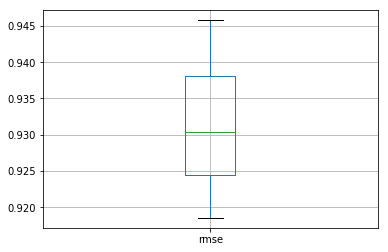

In [103]:
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
series = df['Close']

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-40], supervised_values[-40:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# repeat experiment
repeats = 3
error_scores = list()
for r in range(repeats):
	# fit the model
	lstm_model = fit_lstm(train_scaled, 1, 200, 4)
	# forecast the entire training dataset to build up state for forecasting
	train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
	lstm_model.predict(train_reshaped, batch_size=1)
	# walk-forward validation on the test data
	predictions = list()
	for i in range(len(test_scaled)):
		# make one-step forecast
		X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
		yhat = forecast_lstm(lstm_model, 1, X)
		# invert scaling
		yhat = invert_scale(scaler, X, yhat)
		# invert differencing
		yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
		# store forecast
		predictions.append(yhat)
	# report performance
	rmse = sqrt(mean_squared_error(raw_values[-40:], predictions))
	print('%d) Test RMSE: %.3f' % (r+1, rmse))
	error_scores.append(rmse)

# summarize results
results = DataFrame()
results['rmse'] = error_scores
print(results.describe())
results.boxplot()
pyplot.show()

Normalizing